In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load data
df = pd.read_csv('../data/raw/insurance.csv')

print("=== INSURANCE DATA OVERVIEW ===\n")
print(f"Total records: {len(df):,}")
print(f"Total columns: {len(df.columns)}")
print(f"\nColumn names and types:")
print(df.dtypes)
print(f"\n=== FIRST 10 ROWS ===")
print(df.head(10))
print(f"\n=== BASIC STATISTICS ===")
print(df.describe())
print(f"\n=== MISSING VALUES ===")
print(df.isnull().sum())
print(f"\n=== UNIQUE VALUES PER COLUMN ===")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

Matplotlib is building the font cache; this may take a moment.


=== INSURANCE DATA OVERVIEW ===

Total records: 1,338
Total columns: 7

Column names and types:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

=== FIRST 10 ROWS ===
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692

=== BASIC STATISTICS =

In [2]:
print("=== DETAILED DISTRIBUTIONS ===\n")

# Age distribution
print("AGE DISTRIBUTION:")
print(df['age'].value_counts().sort_index().head(10))

print("\n" + "="*60)
print("SEX DISTRIBUTION:")
print(df['sex'].value_counts())
print(f"Percentage: {df['sex'].value_counts(normalize=True)*100}")

print("\n" + "="*60)
print("SMOKER DISTRIBUTION:")
print(df['smoker'].value_counts())
print(f"Percentage: {df['smoker'].value_counts(normalize=True)*100}")

print("\n" + "="*60)
print("REGION DISTRIBUTION:")
print(df['region'].value_counts())

print("\n" + "="*60)
print("CHILDREN DISTRIBUTION:")
print(df['children'].value_counts().sort_index())

print("\n" + "="*60)
print("CHARGES BY SMOKER STATUS:")
print(df.groupby('smoker')['charges'].describe())

print("\n" + "="*60)
print("CHARGES BY REGION:")
print(df.groupby('region')['charges'].describe())

print("\n" + "="*60)
print("CHARGES BY SEX:")
print(df.groupby('sex')['charges'].describe())

print("\n" + "="*60)
print("CORRELATION WITH CHARGES:")
# Numeric columns only
numeric_cols = ['age', 'bmi', 'children', 'charges']
print(df[numeric_cols].corr()['charges'].sort_values(ascending=False))

=== DETAILED DISTRIBUTIONS ===

AGE DISTRIBUTION:
age
18    69
19    68
20    29
21    28
22    28
23    28
24    28
25    28
26    28
27    28
Name: count, dtype: int64

SEX DISTRIBUTION:
sex
male      676
female    662
Name: count, dtype: int64
Percentage: sex
male      50.523169
female    49.476831
Name: proportion, dtype: float64

SMOKER DISTRIBUTION:
smoker
no     1064
yes     274
Name: count, dtype: int64
Percentage: smoker
no     79.521674
yes    20.478326
Name: proportion, dtype: float64

REGION DISTRIBUTION:
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

CHILDREN DISTRIBUTION:
children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

CHARGES BY SMOKER STATUS:
         count          mean           std         min           25%  \
smoker                                                                 
no      1064.0   8434.268298   5993.781819   1121.8739   3986.438700   
yes      274.0  3205

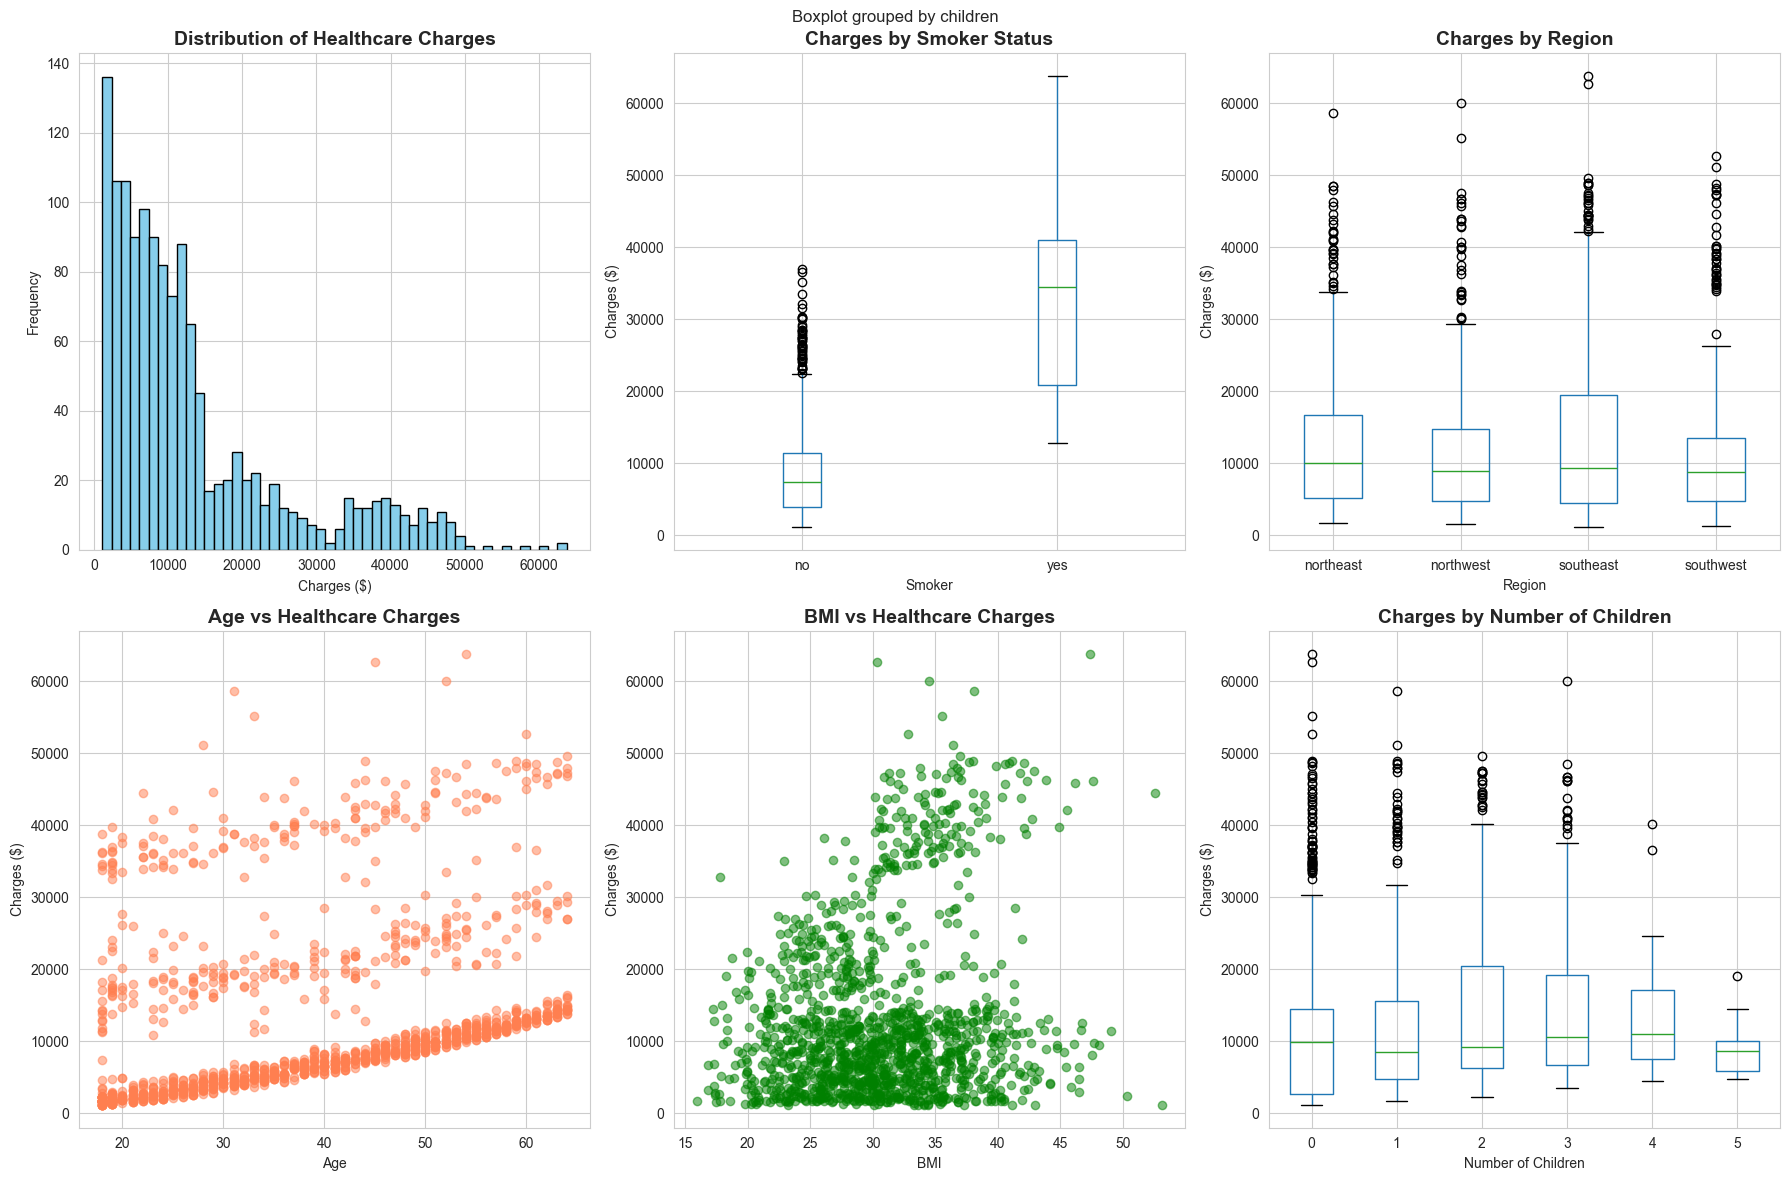

✓ Visualizations saved to data/processed/eda_visualizations.png


In [3]:
# Create comprehensive visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Charges distribution
axes[0, 0].hist(df['charges'], bins=50, edgecolor='black', color='skyblue')
axes[0, 0].set_title('Distribution of Healthcare Charges', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Charges ($)')
axes[0, 0].set_ylabel('Frequency')

# 2. Charges by Smoker
df.boxplot(column='charges', by='smoker', ax=axes[0, 1])
axes[0, 1].set_title('Charges by Smoker Status', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Smoker')
axes[0, 1].set_ylabel('Charges ($)')

# 3. Charges by Region
df.boxplot(column='charges', by='region', ax=axes[0, 2])
axes[0, 2].set_title('Charges by Region', fontsize=14, fontweight='bold')
axes[0, 2].set_xlabel('Region')
axes[0, 2].set_ylabel('Charges ($)')

# 4. Age vs Charges
axes[1, 0].scatter(df['age'], df['charges'], alpha=0.5, c='coral')
axes[1, 0].set_title('Age vs Healthcare Charges', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Charges ($)')

# 5. BMI vs Charges
axes[1, 1].scatter(df['bmi'], df['charges'], alpha=0.5, c='green')
axes[1, 1].set_title('BMI vs Healthcare Charges', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('BMI')
axes[1, 1].set_ylabel('Charges ($)')

# 6. Children vs Charges
df.boxplot(column='charges', by='children', ax=axes[1, 2])
axes[1, 2].set_title('Charges by Number of Children', fontsize=14, fontweight='bold')
axes[1, 2].set_xlabel('Number of Children')
axes[1, 2].set_ylabel('Charges ($)')

plt.tight_layout()
plt.savefig('../data/processed/eda_visualizations.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualizations saved to data/processed/eda_visualizations.png")

In [4]:
# Create enhanced features for modeling
print("=== FEATURE ENGINEERING ===\n")

# Create a copy for modeling
df_model = df.copy()

# Encode categorical variables
df_model['sex_encoded'] = df_model['sex'].map({'male': 1, 'female': 0})
df_model['smoker_encoded'] = df_model['smoker'].map({'yes': 1, 'no': 0})

# One-hot encode region
df_model = pd.get_dummies(df_model, columns=['region'], prefix='region', drop_first=True)

# Create interaction features
df_model['age_smoker'] = df_model['age'] * df_model['smoker_encoded']
df_model['bmi_smoker'] = df_model['bmi'] * df_model['smoker_encoded']
df_model['age_bmi'] = df_model['age'] * df_model['bmi']

# Create age groups
df_model['age_group'] = pd.cut(df_model['age'], bins=[0, 25, 35, 45, 55, 100], 
                               labels=['18-25', '26-35', '36-45', '46-55', '55+'])

# Create BMI categories
df_model['bmi_category'] = pd.cut(df_model['bmi'], bins=[0, 18.5, 25, 30, 100],
                                  labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

print("New features created:")
print(df_model.columns.tolist())

print(f"\n✓ Total features: {len(df_model.columns)}")
print(f"✓ Modeling dataset shape: {df_model.shape}")

# Save processed data
df_model.to_csv('../data/processed/insurance_processed.csv', index=False)
print("\n✓ Processed data saved to data/processed/insurance_processed.csv")

print("\n=== SAMPLE OF PROCESSED DATA ===")
print(df_model.head())

=== FEATURE ENGINEERING ===

New features created:
['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'sex_encoded', 'smoker_encoded', 'region_northwest', 'region_southeast', 'region_southwest', 'age_smoker', 'bmi_smoker', 'age_bmi', 'age_group', 'bmi_category']

✓ Total features: 16
✓ Modeling dataset shape: (1338, 16)

✓ Processed data saved to data/processed/insurance_processed.csv

=== SAMPLE OF PROCESSED DATA ===
   age     sex     bmi  children smoker      charges  sex_encoded  \
0   19  female  27.900         0    yes  16884.92400            0   
1   18    male  33.770         1     no   1725.55230            1   
2   28    male  33.000         3     no   4449.46200            1   
3   33    male  22.705         0     no  21984.47061            1   
4   32    male  28.880         0     no   3866.85520            1   

   smoker_encoded  region_northwest  region_southeast  region_southwest  \
0               1             False             False              True   
1        

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("=== BUILDING PREDICTIVE MODELS ===\n")

# Select features for modeling
feature_cols = ['age', 'sex_encoded', 'bmi', 'children', 'smoker_encoded',
                'region_northwest', 'region_southeast', 'region_southwest',
                'age_smoker', 'bmi_smoker', 'age_bmi']

X = df_model[feature_cols]
y = df_model['charges']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {len(X_train)} samples")
print(f"Test set: {len(X_test)} samples\n")

# MODEL 1: Linear Regression
print("="*60)
print("MODEL 1: LINEAR REGRESSION")
print("="*60)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

lr_mae = mean_absolute_error(y_test, lr_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_r2 = r2_score(y_test, lr_pred)

print(f"Mean Absolute Error (MAE): ${lr_mae:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${lr_rmse:,.2f}")
print(f"R² Score: {lr_r2:.4f}")
print(f"→ Model explains {lr_r2*100:.2f}% of variance in costs")

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': lr_model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print("\nTop 5 Most Important Features:")
print(feature_importance.head())

# MODEL 2: Random Forest
print("\n" + "="*60)
print("MODEL 2: RANDOM FOREST REGRESSOR")
print("="*60)

rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

print(f"Mean Absolute Error (MAE): ${rf_mae:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rf_rmse:,.2f}")
print(f"R² Score: {rf_r2:.4f}")
print(f"→ Model explains {rf_r2*100:.2f}% of variance in costs")

# Feature importance for Random Forest
rf_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 5 Most Important Features:")
print(rf_importance.head())

# MODEL COMPARISON
print("\n" + "="*60)
print("MODEL COMPARISON")
print("="*60)

comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'MAE': [lr_mae, rf_mae],
    'RMSE': [lr_rmse, rf_rmse],
    'R² Score': [lr_r2, rf_r2]
})

print(comparison.to_string(index=False))

print("\n✓ Best Model:", comparison.loc[comparison['R² Score'].idxmax(), 'Model'])

# Save models (we'll use joblib later)
print("\n✓ Models trained successfully")

=== BUILDING PREDICTIVE MODELS ===

Training set: 1070 samples
Test set: 268 samples

MODEL 1: LINEAR REGRESSION
Mean Absolute Error (MAE): $2,760.61
Root Mean Squared Error (RMSE): $4,567.93
R² Score: 0.8656
→ Model explains 86.56% of variance in costs

Top 5 Most Important Features:
            Feature   Coefficient
4    smoker_encoded -21368.943767
9        bmi_smoker   1474.352184
7  region_southwest  -1242.074183
6  region_southeast   -957.184975
5  region_northwest   -621.854842

MODEL 2: RANDOM FOREST REGRESSOR
Mean Absolute Error (MAE): $2,433.71
Root Mean Squared Error (RMSE): $4,476.13
R² Score: 0.8709
→ Model explains 87.09% of variance in costs

Top 5 Most Important Features:
       Feature  Importance
9   bmi_smoker    0.770520
0          age    0.096914
10     age_bmi    0.059220
2          bmi    0.027407
3     children    0.016132

MODEL COMPARISON
            Model         MAE        RMSE  R² Score
Linear Regression 2760.610775 4567.930941  0.865596
    Random Forest 2

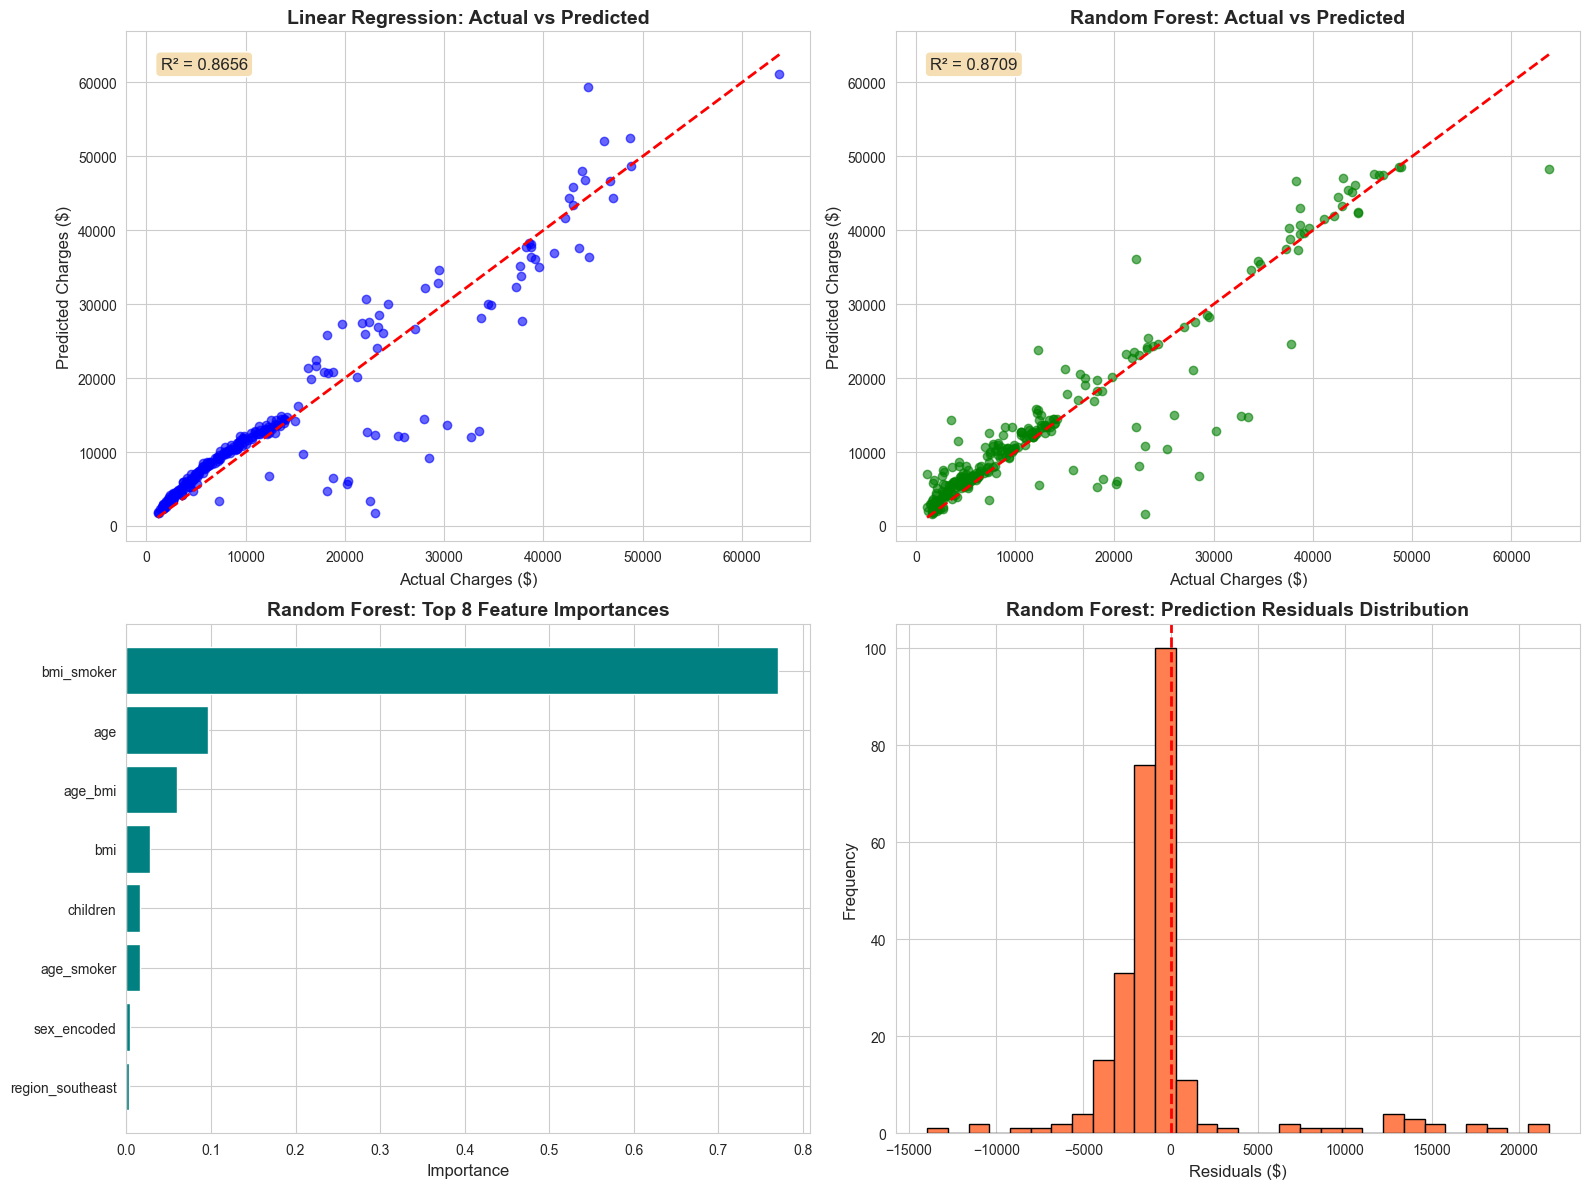

✓ Model performance visualizations saved

=== PREDICTION ERROR ANALYSIS ===

Random Forest Residuals:
Mean error: $-334.78
Std deviation: $4,471.94
Max underestimate: $-13,965.95
Max overestimate: $21,697.17

Prediction Accuracy:
Within $1,000: 42.2% of predictions
Within $5,000: 89.9% of predictions
Within $10,000: 93.3% of predictions


In [7]:
# Visualize model performance
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Actual vs Predicted (Linear Regression)
axes[0, 0].scatter(y_test, lr_pred, alpha=0.6, color='blue')
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Charges ($)', fontsize=12)
axes[0, 0].set_ylabel('Predicted Charges ($)', fontsize=12)
axes[0, 0].set_title('Linear Regression: Actual vs Predicted', fontsize=14, fontweight='bold')
axes[0, 0].text(0.05, 0.95, f'R² = {lr_r2:.4f}', transform=axes[0, 0].transAxes, 
                fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat'))

# 2. Actual vs Predicted (Random Forest)
axes[0, 1].scatter(y_test, rf_pred, alpha=0.6, color='green')
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 1].set_xlabel('Actual Charges ($)', fontsize=12)
axes[0, 1].set_ylabel('Predicted Charges ($)', fontsize=12)
axes[0, 1].set_title('Random Forest: Actual vs Predicted', fontsize=14, fontweight='bold')
axes[0, 1].text(0.05, 0.95, f'R² = {rf_r2:.4f}', transform=axes[0, 1].transAxes,
                fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat'))

# 3. Feature Importance (Random Forest)
rf_importance_plot = rf_importance.head(8)
axes[1, 0].barh(rf_importance_plot['Feature'], rf_importance_plot['Importance'], color='teal')
axes[1, 0].set_xlabel('Importance', fontsize=12)
axes[1, 0].set_title('Random Forest: Top 8 Feature Importances', fontsize=14, fontweight='bold')
axes[1, 0].invert_yaxis()

# 4. Residuals Distribution
residuals = y_test - rf_pred
axes[1, 1].hist(residuals, bins=30, edgecolor='black', color='coral')
axes[1, 1].set_xlabel('Residuals ($)', fontsize=12)
axes[1, 1].set_ylabel('Frequency', fontsize=12)
axes[1, 1].set_title('Random Forest: Prediction Residuals Distribution', fontsize=14, fontweight='bold')
axes[1, 1].axvline(x=0, color='red', linestyle='--', linewidth=2)

plt.tight_layout()
plt.savefig('../data/processed/model_performance.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Model performance visualizations saved")

# Summary statistics
print("\n=== PREDICTION ERROR ANALYSIS ===")
print(f"\nRandom Forest Residuals:")
print(f"Mean error: ${residuals.mean():,.2f}")
print(f"Std deviation: ${residuals.std():,.2f}")
print(f"Max underestimate: ${residuals.min():,.2f}")
print(f"Max overestimate: ${residuals.max():,.2f}")

# Percentage within error ranges
within_1k = (abs(residuals) <= 1000).sum() / len(residuals) * 100
within_5k = (abs(residuals) <= 5000).sum() / len(residuals) * 100
within_10k = (abs(residuals) <= 10000).sum() / len(residuals) * 100

print(f"\nPrediction Accuracy:")
print(f"Within $1,000: {within_1k:.1f}% of predictions")
print(f"Within $5,000: {within_5k:.1f}% of predictions")
print(f"Within $10,000: {within_10k:.1f}% of predictions")